In [18]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime, date, timedelta
import yfinance as yfin
yfin.pdr_override()


# Graph
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt
#import seaborn as sns
from math import log, sqrt, pi, exp
from scipy.stats import norm

import pandas_montecarlo

import warnings

In [19]:
pd.set_option('display.float_format', lambda x: f'{x:,.6f}')
plt.rcParams["figure.figsize"] = (10,6)

warnings.filterwarnings("ignore")

# Option Pricing Instructions Option Pricing Instructions
- Download the pandas-montecarlo package from Github
- Duplicate the 'Spy' simulation 
- Substitute data for one of the assets in your portfolio and run the simulation for that asset
- Using the simulation price a European option for that asset.
- Post your results here.
- Upload your code to GitHub Classroom
- Summarize your results in a thread on the discussion board.


# Variables

In [20]:
start_date = datetime(2022, 1, 1)
purchase_date = datetime(2023, 9, 11)
split_date = datetime(2023,8,24)
today = datetime(2023,12,4)

expiry = '01-01-2024'
strike_price_call = 60
strike_price_put = 70

one_year_ago = today.replace(year=today.year-1)

RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)


mc_sims = 50 
mc_bust = -.4
mc_goal = 1

# Functions

In [21]:
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))

def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
  
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S*bs_call(S,K,T,r,sigma)

# Load Portfolio Returns

For this analysis I will focus on the following AI stock TWLO:

- TWLO - Twilio Inc (NYSE:TWLO)

AI is a sector that we are targeting as part of the investment strategy so focusing these stock is consistent with the broader portfolio strategy. 

In [22]:
# Load Stock Data
sp_list = ['TWLO']
df = pdr.get_data_yahoo(sp_list, start=purchase_date, end=today)[['Close']]

# Calc Returns
df = df.sort_values(by="Date")
df = df.dropna()
df['returns'] = df.Close.pct_change()
print('df: ',df.shape)

[*********************100%%**********************]  1 of 1 completed
df:  (59, 2)


In [23]:
df.tail()

,Close,returns
Date,,
2023-11-27,62.849998,-0.003014
2023-11-28,65.099998,0.035800
2023-11-29,66.129997,0.015822
2023-11-30,64.680000,-0.021926
2023-12-01,66.760002,0.032158


# Monte Carlo Simulator for Pandas Series

mc.data: (59, 50)


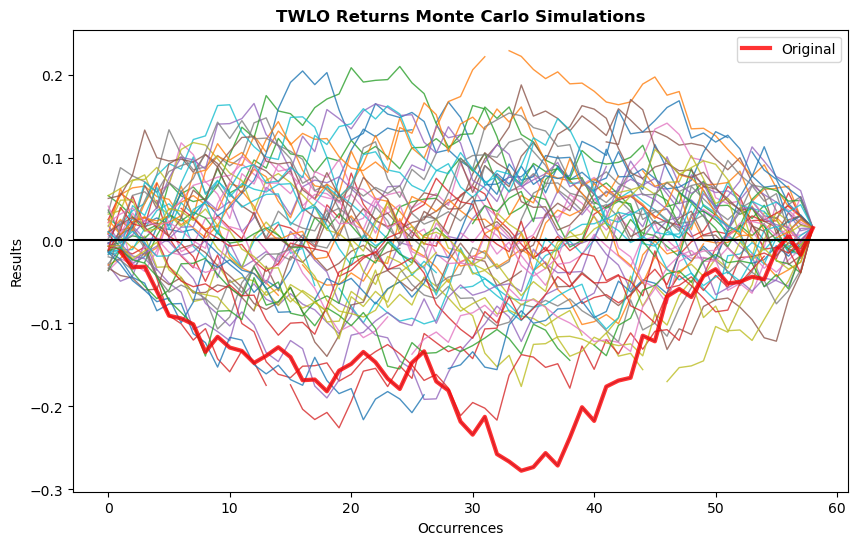

In [24]:
mc = df['returns'].montecarlo(sims=mc_sims, bust=mc_bust, goal=mc_goal)
print('mc.data:', mc.data.shape)
mc.plot(title="TWLO Returns Monte Carlo Simulations")  # optional: , figsize=(x, y)

The 

In [25]:
mc.stats

{'min': 0.015126196466012432,
 'max': 0.015126196466012432,
 'mean': 0.015126196466012432,
 'median': 0.015126196466012432,
 'std': 0.0,
 'maxdd': -0.2774287941390854,
 'bust': 0.0,
 'goal': 0.0}

# Simulation Price a European Option

In [26]:
sigma = np.sqrt(252) * mc.stats['std']
print('sigma: ' , sigma)

uty = (pdr.get_data_yahoo("^TNX", start=today.replace(day=today.day-3), end=today)['Close'].iloc[-1])/100
print('uty: ' , uty)

# lcp
lcp = df['Close'].iloc[-1]
print('lcp: ' , lcp)

t = (datetime.strptime(expiry, "%m-%d-%Y") - datetime.utcnow()).days / 365
print('t: ' , t)

sigma:  0.0
[*********************100%%**********************]  1 of 1 completed
uty:  0.0422599983215332
lcp:  66.76000213623047
t:  0.07123287671232877


In [27]:
print('The Call Option Price is: ', round(bs_call(lcp, strike_price_call, t, uty, sigma),4))
print('The Put Option Price is: ', round(bs_put(lcp, strike_price_put, t, uty, sigma),4))

The Call Option Price is:  6.9403
The Put Option Price is:  69.7896


# Conclusion
The prices for a european call option on TWLO For this analysis I used the following variables:

- mc_sim = 50
- mc_bust = 0.4
- mc_goal = 1
- stock = TWLO - Twilio Inc (NYSE:TWLO)
- expiry = '01-01-2024'
- strike_price_call = 60
- strike_price_put = 70

The resulting prices for the put and call option are:

- Call Option Price is:  6.9403
- Put Option Price is:  69.7896